In [1]:
import scipy as sp
import numpy as np
import time

try:
    from localgraphclustering import *
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    from localgraphclustering import * 

import time

## Load data

In [2]:
g = GraphLocal('datasets/JohnsHopkins.graphml','graphml')

/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:217: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



## Example on how to find all clusters in graph using local graph clustering

In [3]:
from sklearn.metrics import pairwise_distances

start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
embeddings = compute_all_embeddings(g,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6)
X = normalize_embeddings(g,embeddings, norm_type = 2)
Z = pairwise_distances(X, metric='euclidean', n_jobs=6)
end = time.time()
print(end - start)

18.753748893737793


In [4]:
start = time.time()
# Find the clusters
labels = compute_clusters_given_distance(nclusters=4,Z=Z)
end = time.time()
print(end - start)

0.9901587963104248


## Visualize the output

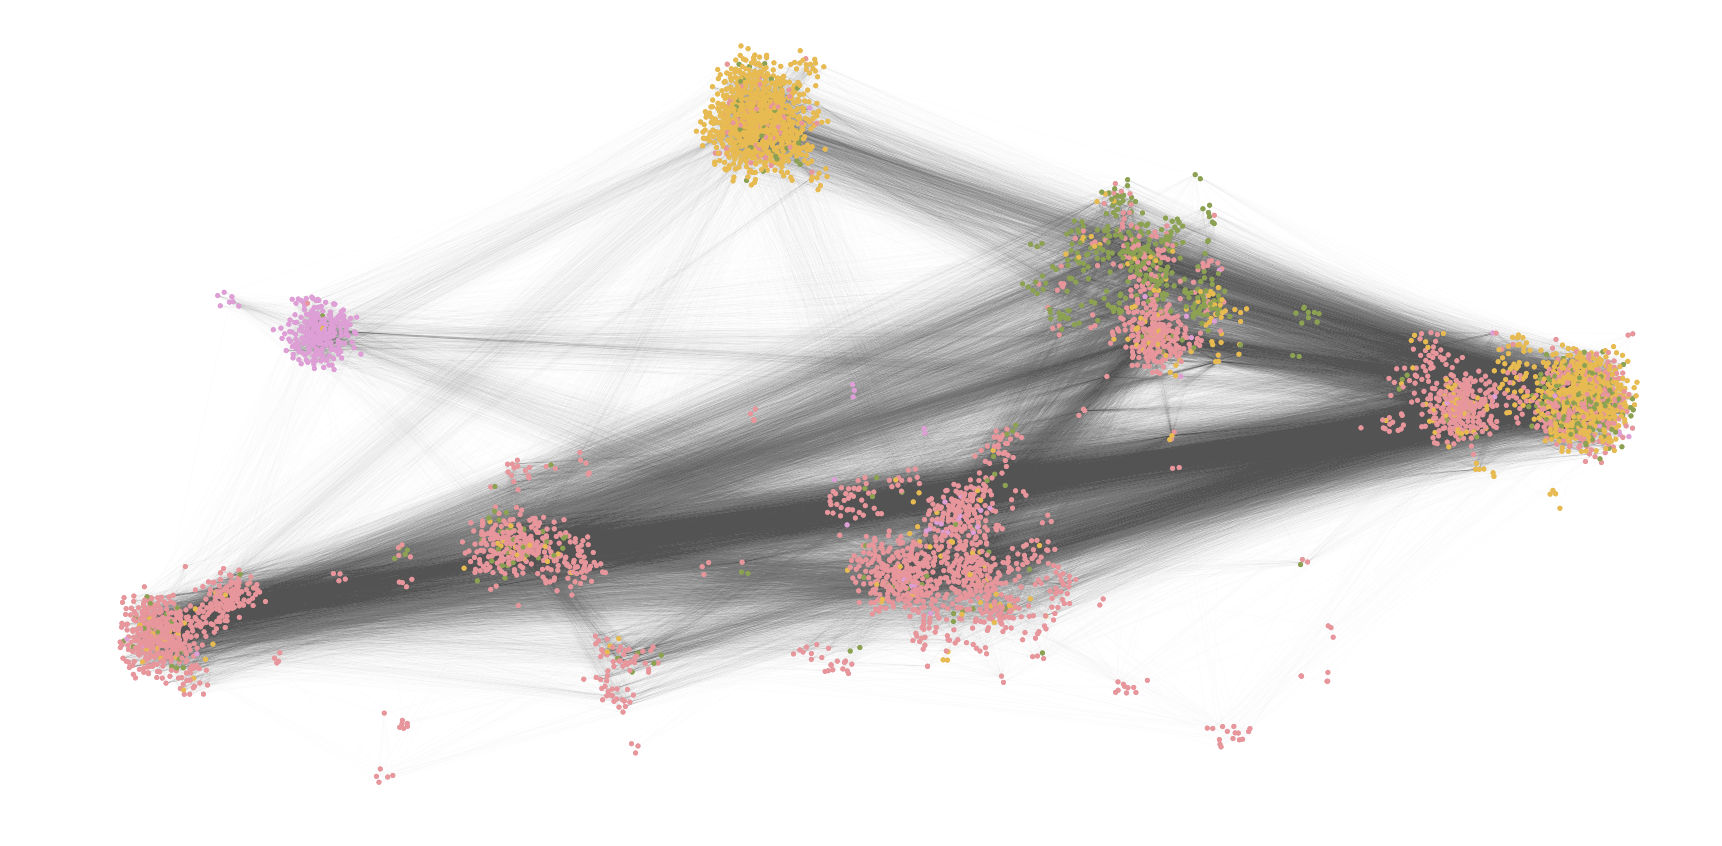

In [5]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

## Another example

In [6]:
# This example computes the embeddings and the clusters in one function. It is not recommended when we want to experiment
# with multiple parameters nclusters. Look at the fist example above for a faster approach.
labels = find_clusters(g,nclusters=4,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6)

## Visualize the output

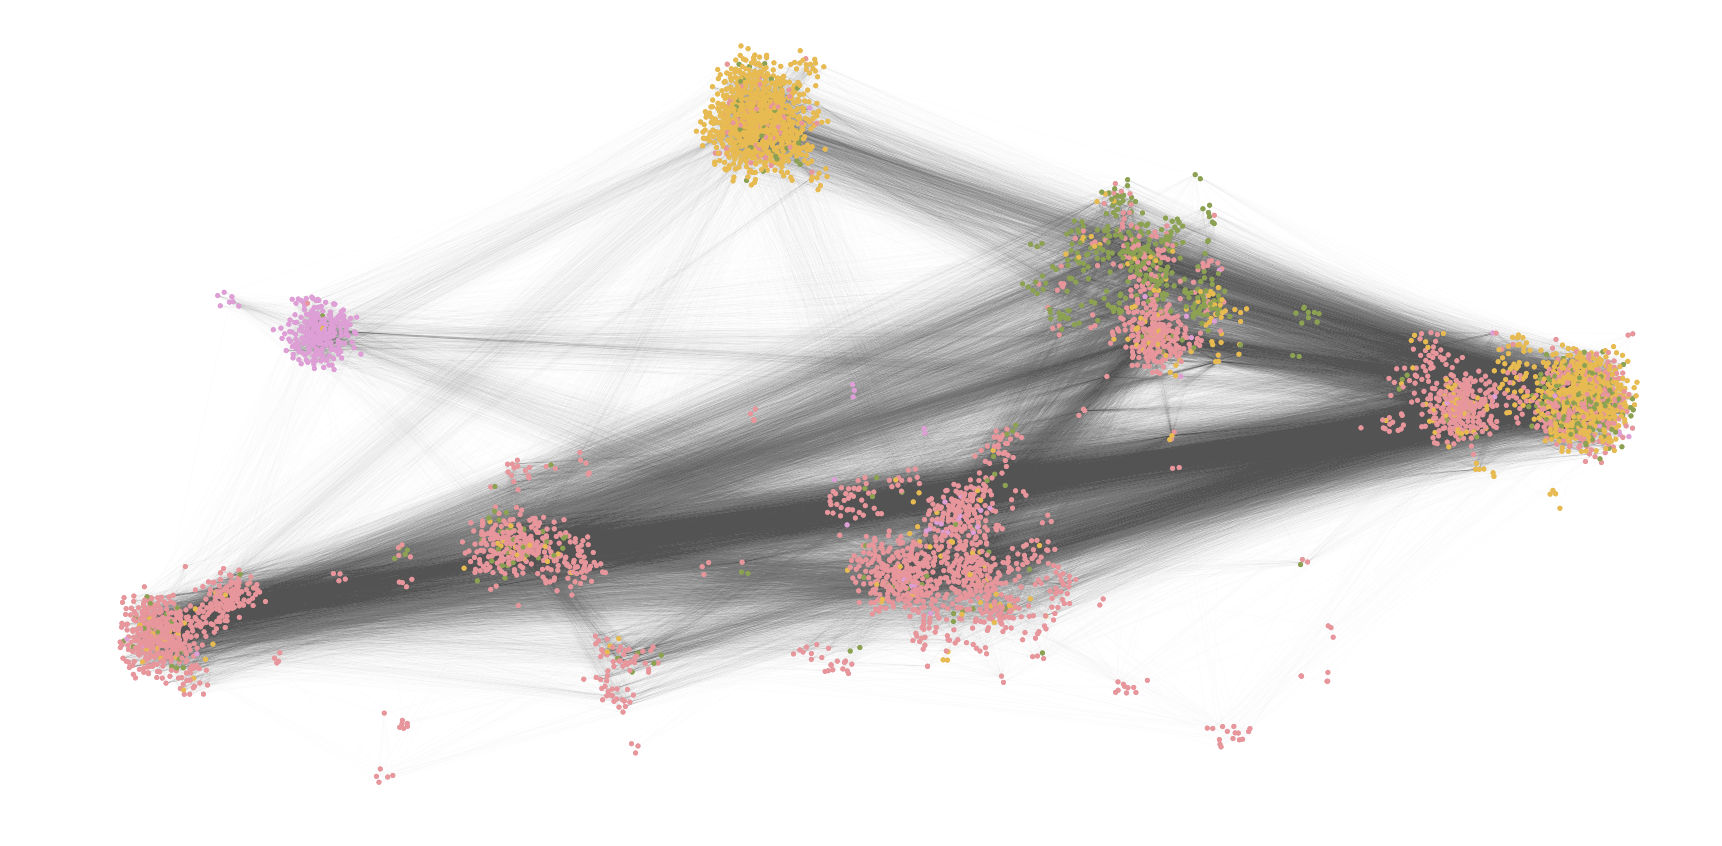

In [7]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

## Segment the graph

In [8]:
start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
labels, info = graph_segmentation(g,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6,ratio=0.1)
end = time.time()
print(end - start)

1.40743088722229eted:  97.07194105099865


In [9]:
X, Z = compute_embeddings_and_distances_from_region_adjacency(g,info,n_jobs=6)

In [10]:
labels = compute_clusters_from_region_adjacency(g,4,Z,info)

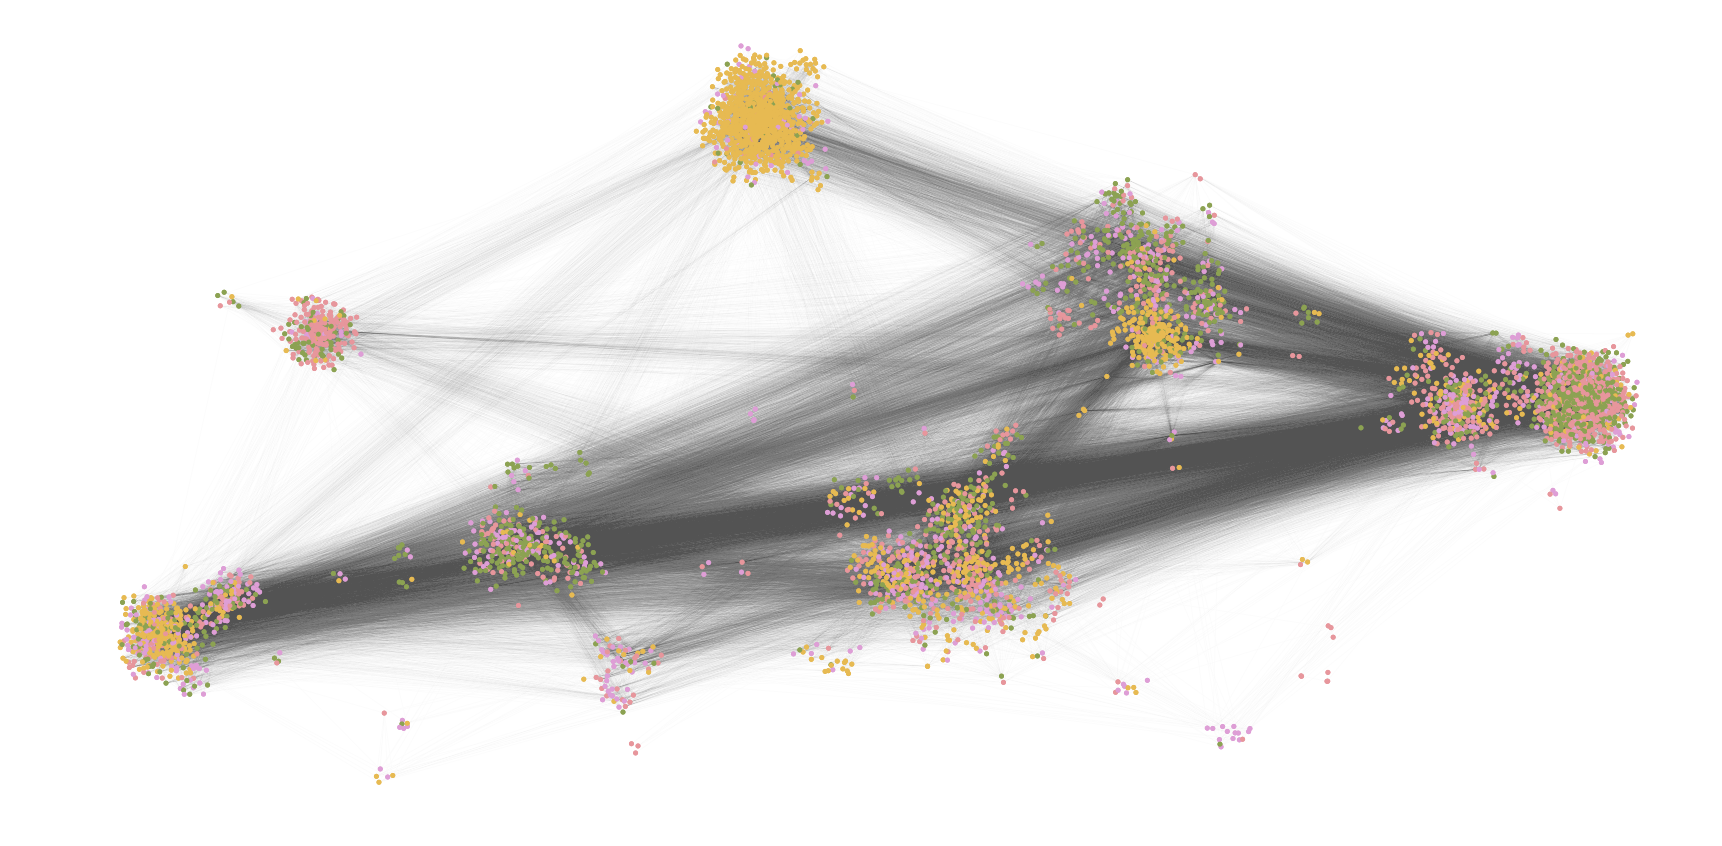

In [11]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)